<a href="https://colab.research.google.com/github/YaBoyBlue/GoogleColab/blob/main/Temperature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
file = 'drive/My Drive/Colab Notebooks/Preparation/Data/3567724.csv'

df = pd.read_csv(file)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28273 entries, 0 to 28272
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  28273 non-null  object 
 1   NAME     28273 non-null  object 
 2   DATE     28273 non-null  object 
 3   TAVG     6629 non-null   float64
 4   TMAX     28255 non-null  float64
 5   TMIN     28255 non-null  float64
dtypes: float64(3), object(3)
memory usage: 1.3+ MB


In [ ]:
df

,STATION,NAME,DATE,TAVG,TMAX,TMIN
0,USW00012921,"SAN ANTONIO INTERNATIONAL AIRPORT, TX US",1946-08-14,30.2,NaN,NaN
1,USW00012921,"SAN ANTONIO INTERNATIONAL AIRPORT, TX US",1946-08-15,29.6,NaN,NaN
2,USW00012921,"SAN ANTONIO INTERNATIONAL AIRPORT, TX US",1946-08-16,29.9,NaN,NaN
3,USW00012921,"SAN ANTONIO INTERNATIONAL AIRPORT, TX US",1946-08-17,30.0,NaN,NaN
4,USW00012921,"SAN ANTONIO INTERNATIONAL AIRPORT, TX US",1946-08-18,30.0,NaN,NaN
...,...,...,...,...,...,...
28268,USW00012921,"SAN ANTONIO INTERNATIONAL AIRPORT, TX US",2024-01-05,13.1,18.9,5.0
28269,USW00012921,"SAN ANTONIO INTERNATIONAL AIRPORT, TX US",2024-01-06,9.9,19.4,2.8
28270,USW00012921,"SAN ANTONIO INTERNATIONAL AIRPORT, TX US",2024-01-07,10.6,18.9,3.3
28271,USW00012921,"SAN ANTONIO INTERNATIONAL AIRPORT, TX US",2024-01-08,16.1,22.8,10.0


In [ ]:
station_id = df.loc[0]['STATION']
station_name = df.loc[0]['NAME']

df.drop(['STATION', 'NAME'], axis='columns', inplace=True)

In [ ]:
df['TMAX'].fillna(df['TAVG'], inplace = True)
df['TMIN'].fillna(df['TAVG'], inplace = True)
df['TAVG'].fillna(((df['TMIN'] + df['TMAX']) / 2), inplace = True)

In [ ]:
df['DATE_SPLIT'] = df['DATE'].str.split('-')

In [ ]:
df

,DATE,TAVG,TMAX,TMIN,DATE_SPLIT
0,1946-08-14,30.2,30.2,30.2,"[1946, 08, 14]"
1,1946-08-15,29.6,29.6,29.6,"[1946, 08, 15]"
2,1946-08-16,29.9,29.9,29.9,"[1946, 08, 16]"
3,1946-08-17,30.0,30.0,30.0,"[1946, 08, 17]"
4,1946-08-18,30.0,30.0,30.0,"[1946, 08, 18]"
...,...,...,...,...,...
28268,2024-01-05,13.1,18.9,5.0,"[2024, 01, 05]"
28269,2024-01-06,9.9,19.4,2.8,"[2024, 01, 06]"
28270,2024-01-07,10.6,18.9,3.3,"[2024, 01, 07]"
28271,2024-01-08,16.1,22.8,10.0,"[2024, 01, 08]"


In [ ]:
df_monthly_avg = df.groupby(pd.PeriodIndex(df['DATE'], freq='M'))['TAVG'].mean().reset_index()
df_yearly_avg = df.groupby(pd.PeriodIndex(df['DATE'], freq='Y'))['TAVG'].mean().reset_index()

In [ ]:
import matplotlib.pyplot as plt

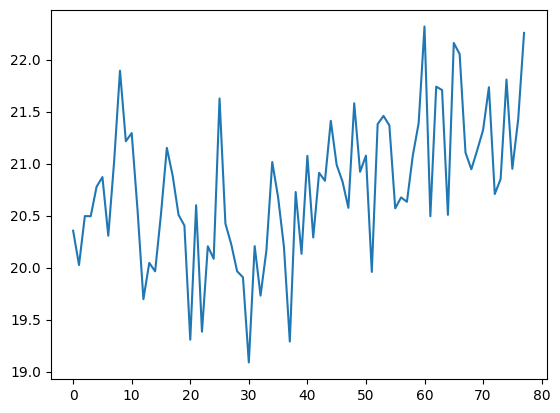

In [ ]:
plt.plot(df_yearly_avg.index[:-1], df_yearly_avg['TAVG'].to_list()[:-1])

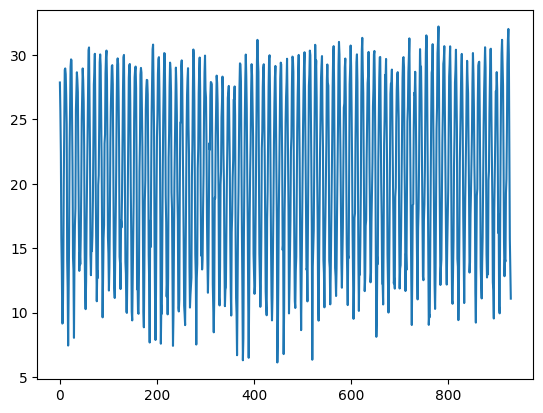

In [ ]:
plt.plot(df_monthly_a vg.index, df_monthly_avg['TAVG'].to_list())